In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
data = pd.read_csv('dataset/MHTech.csv') # Gets data from model
print(data.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [4]:
pd.get_dummies(data)

,Age,Timestamp_2014-08-27 11:29:31,Timestamp_2014-08-27 11:29:37,Timestamp_2014-08-27 11:29:44,Timestamp_2014-08-27 11:29:46,Timestamp_2014-08-27 11:30:22,Timestamp_2014-08-27 11:31:22,Timestamp_2014-08-27 11:31:50,Timestamp_2014-08-27 11:32:05,Timestamp_2014-08-27 11:32:39,...,comments_Would you bring up a mental health issue with a potential employer in an interview?Poignant.,comments_YOU MAY WANT TO THROW OUT MY ENTRY.I answered all of these questions with the assumption that Attention Deficit Disorder is considered a mental illness and with ADD in mind.,comments_as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),comments_fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,comments_i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,comments_it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,comments_password: testered,comments_suffer from CR-PTSD so all answered based on that,comments_thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,comments_you rock for doing this!
0,37,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,44,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,32,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,31,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,31,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1255,32,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1256,34,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1257,46,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# getting input for variables (eventually to be replaced by web-app
# usr_age = input('Enter your age: ')
# usr_gender = input('Enter your gender (M, F, NB, NA): ')
# usr_sleep = input('How many hours a night do you sleep? : ')
# usr_work = input('How many hours a week do you work? : ')
# usr_fitness = input('How many hours a week do you excercise? : ')
# usr_consult = input('Have you been consulted for a mental health condition in the past?: ')
# usr_stress = input('What is your stress level?: ')


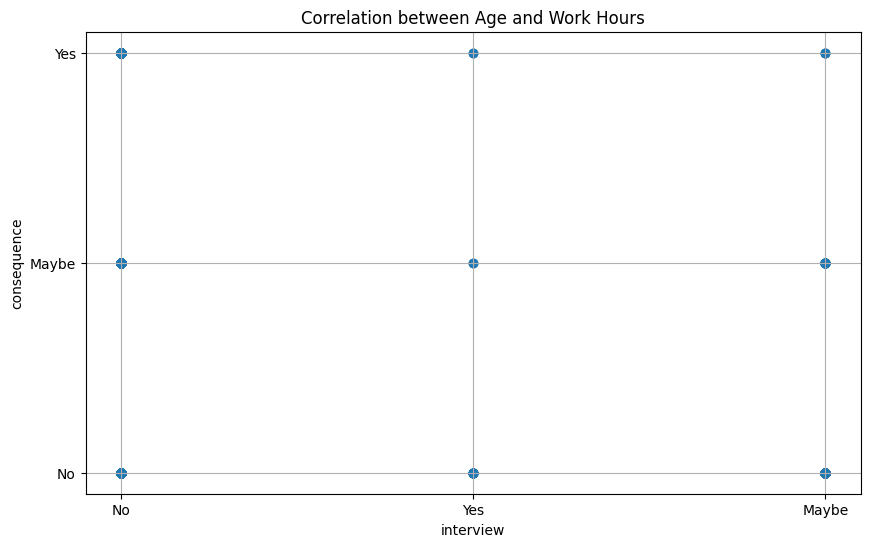

In [8]:
#correlation btwn age and hours worked
plt.figure(figsize=(10, 6))
plt.scatter(data['mental_health_interview'], data['mental_health_consequence'], alpha=0.5)
plt.title("Correlation between Age and Work Hours")
plt.xlabel("interview")
plt.ylabel("consequence")
plt.grid(True)
plt.show()

<BarContainer object of 1259 artists>

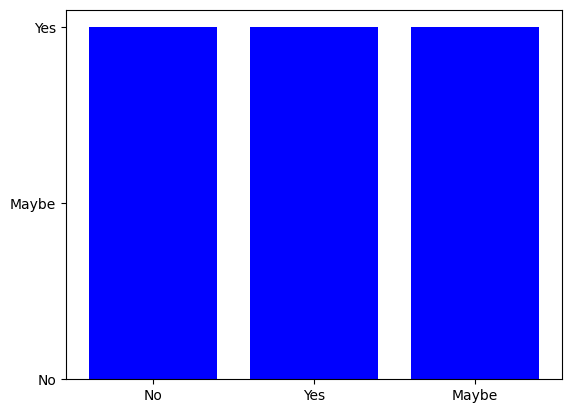

In [6]:
plt.bar(data['mental_health_interview'], data['mental_health_consequence'], color='blue')

In [41]:
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'Country', 'Severity', 'Consultation_History', 'Stress_Level']

In [42]:
# loop to convert values into numerical data that can be used by the model
for column in categorical_columns: 
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [43]:
# selects target data, which is mental health condition in this case (we are trying to predict it)
target_encoder = LabelEncoder()
data['Mental_Health_Condition'] = target_encoder.fit_transform(data['Mental_Health_Condition'])

In [44]:
# sets features and target
features = ['Age', 'Gender', 'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']
target = 'Mental_Health_Condition'

In [45]:
X = data[features] # conventional names to represent feats and target are X and y
y = data[target]

In [46]:
#for normalizing data (scales x so mean to 0 and SD to 1)
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [47]:
# splitting training and testing data 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)


In [48]:
# making tensors based off data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [49]:
print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([700, 6])
torch.Size([300, 6])
torch.Size([700])
torch.Size([300])


In [77]:
#MODEL CREATION
class MentalHealthModel(nn.Module):
    def __init__(self, input_size):
        super(MentalHealthModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 2)  # 2 output classes: Yes or No
        self.dropout = nn.Dropout(0.3)  # Dropout layer with 30% probability

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [78]:
input_size = X_train_tensor.shape[1] 
model = MentalHealthModel(input_size) # model initialized
criterion = nn.CrossEntropyLoss() # loss function initialized
optimizer = optim.Adam(model.parameters(), lr=0.001) # optimizer initialized


In [79]:
# training model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # fwd pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # calc loss; optimizer step
    loss.backward()
    optimizer.step()
    # print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6928
Epoch [20/100], Loss: 0.6931
Epoch [30/100], Loss: 0.6914
Epoch [40/100], Loss: 0.6909
Epoch [50/100], Loss: 0.6908
Epoch [60/100], Loss: 0.6893
Epoch [70/100], Loss: 0.6891
Epoch [80/100], Loss: 0.6881
Epoch [90/100], Loss: 0.6890
Epoch [100/100], Loss: 0.6886


In [80]:
# model evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 49.33%


100
